# Asymmetrical bang-bang solution and pursuit


Let $t$ be the time variable, $T$ the time (in $s$) when the target is pointed, $x(t)$ and $\dot{x}(t)$ respectively the position and the velocity at time $t$, $x_T$ the position to reach, $\rho \in \left [0 ,1\right]$.  
$x(t=0) = 0$ and $\dot{x}(t=0) = 0$  
  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$\forall t \in \intervalle{0}{\rho\cdot T} : u(t) = U_+$  
$\forall t \in \intervalleof{\rho\cdot T}{T} : u(t) = U_-$  
$\forall t \in \intervalleoo{T}{+\infty} : u(t) = U_{\infty}$  
  
Formally, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

where $\mathbb 1_{\mathcal{I}}$ is the [indicator function](https://en.wiktionary.org/wiki/indicator_function#English) of the interval $\mathcal{I}$
  
We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{1}{\tau}\cdot\dot{x}(t)+u(t)
$$

where $\tau$ is a constant of the eye, with $\left[\tau\right] = s$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tau = 0.013
xT = 9
dt = 0.0001
t_T = .05
t_R = .05
k = 0.00001
T = int(t_T/dt)
R = int(t_R/dt)
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000
x0 = np.array([5,20])
v0 = 20

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_+$  
  
We find:  $\dot{x}(t) = U_+\cdot\tau\left (1-e^{- \frac{t}{\tau}} \right )$ and so : $x(t) = U_+\cdot\tau\left [t-\tau\left(1-e^{- \frac{t}{\tau}} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_-$  
  
We find:  $\dot{x}(t) = U_-\cdot\tau\left (1-e^{\frac{T-t}{\tau}} \right ) + v\cdot e^{\frac{T-t}{\tau}}$ and so : $x(t) = x_T +v\cdot T- U_-\cdot\tau\left [T-t+\tau\left(1-e^{\frac{T-t}{\tau}} \right )\right] + v\cdot \tau\left(1-e^{\frac{T-t}{\tau}} \right )$

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_{\infty}$  
  
We find:  $U_{\infty} = \dfrac{1}{\tau}\cdot v$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = v$ (and $\ddot{x}(t) = 0$) and so : $x(t) = v\cdot \left ( t - T \right)+x_T+v\cdot T$

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
    
$U_+ = U_- \cdot \dfrac{1-e^{\frac{\left(1-\rho \right)T}{\tau}}}{1-e^{-\frac{\rho T}{\tau}}}$  
  
With the continuity of the position at time $\rho\cdot T$, we find relations between $U_-$ and $\rho$, and between $U_+$ and $\rho$ thanks to the previous formula.  

$U_- = \dfrac{1}{\tau} \cdot \dfrac{\left (x_T + v\cdot T+v\cdot\tau \right)\left (1-e^{-\frac{\rho T}{\tau}}\right)-v\cdot\rho\cdot T \left (1-e^{\frac{\left(1-\rho \right)T}{\tau}} \right )}{T-\left (1-\rho\right)T e^{-\frac{\rho T}{\tau}}-\rho T e^{\frac{\left(1-\rho \right)T}{\tau}}}$


In [3]:
def fact(n): 
    """The factorial function
    Returns n!, that is n x (n-1) x (n-2) x ... x 1
    Recursive implementation
    """
    if n == 0:
        return 1
    else:
        return(n*fact(n-1))

In [4]:
# definition of A and B
A = np.zeros((2,2))
B = np.zeros(2)
for i in np.arange(2):
    for j in np.arange(i,2):
        A[i,j] = dt**(j-i)/fact(j-i)
A[1, 1] = 1-dt/tau
B[1] = dt

In [5]:
def power(A, n): 
    """
    renvoie A puissance n où A est une matrice carrée
        
    """
    if n == 0:
        return(np.eye(int(np.sqrt(np.size(A)))))
    elif n == 1:
        return A
    else:
        if n % 2 == 0:
            A_half = power(A, n//2)
            return(A_half.dot(A_half))
        else:
            A_half = power(A, (n-1)//2)
            return(A.dot(A_half.dot(A_half)))

def A_pow(A):
    A_pow_array = np.zeros((T+R+1,2,2))

    for i in np.arange(T+R+1):
        A_pow_array[i] = power(A,i)
    return A_pow_array

A_pow_array = A_pow(A)

def pow_fast(n):
    return A_pow_array[n]

ci0_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci0_array[i] = (pow_fast(i).dot(B))[0]

ci1_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci1_array[i] = (pow_fast(i).dot(B))[1]
    
#ci2_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci2_array[i] = (pow_fast(i).dot(B))[2]
    
#ci3_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci3_array[i] = (pow_fast(i).dot(B))[3]

ci = np.array([ci0_array, ci1_array])

In [6]:
def expectation(u, t):
    """Computation of the expectation of the state vector at time t, given u
    """
    if t == 0:
        return x0
    else:
        return pow_fast(t).dot(x0)+(ci[:,0:t]*np.flipud(u[0:t])).sum(axis = 1)

In [7]:
def variance(u, t):
    """Computation of the variance of the state vector at time t, given u
    """
    return k*(np.flipud(ci0_array[0:t]**2)*u[0:t]**2).sum()

In [8]:
n = 100 # number of rho's values

In [9]:
rho = np.linspace(0.5,0.999,n) # rho's tested values

In [10]:
Umoins = 1/tau*((xT+v0*(t_T+tau))*(1-np.exp(-rho*t_T/tau))-v0*rho*t_T*np.exp((1-rho)*t_T/tau))/(t_T-(1-rho)*t_T*np.exp(-rho*t_T/tau)-rho*t_T*np.exp((1-rho)*t_T/tau))

In [11]:
Uplus = (1-np.exp((1-rho)*t_T/tau))/(1-np.exp(-rho*t_T/tau))*Umoins+1/tau*v0*np.exp((1-rho)*t_T/tau)/(1-np.exp(-rho*t_T/tau))

In [12]:
Umoins = 1/tau*((xT-x0[0]+v0*(t_T+tau)-0*x0[1]*(rho*t_T+tau))*(1-np.exp(-rho*t_T/tau))-rho*t_T*(v0*np.exp((1-rho)*t_T/tau)-0*x0[1]))/(t_T-(1-rho)*t_T*np.exp(-rho*t_T/tau)-rho*t_T*np.exp((1-rho)*t_T/tau))

Uplus = (1-np.exp((1-rho)*t_T/tau))/(1-np.exp(-rho*t_T/tau))*Umoins+1/tau*(v0*np.exp((1-rho)*t_T/tau)-0*x0[1])/(1-np.exp(-rho*t_T/tau))


In [13]:
u = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    rhoT = np.round(T*rho[i])
    u[i,:] = np.concatenate((Uplus[i]*np.ones(rhoT), Umoins[i]*np.ones(T-rhoT), 1/tau*v0*np.ones(R+1)))

In [14]:
position = np.zeros((n-1, T+R+1))
velocity = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    for j in np.arange(T+R+1):
        mean = expectation(u[i,:], j)
        position[i,j] = mean[0]
        velocity[i,j] = mean[1]

In [15]:
variancev = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    for j in np.arange(T+R+1):
        variancev[i,j] = variance(u[i,:], j)

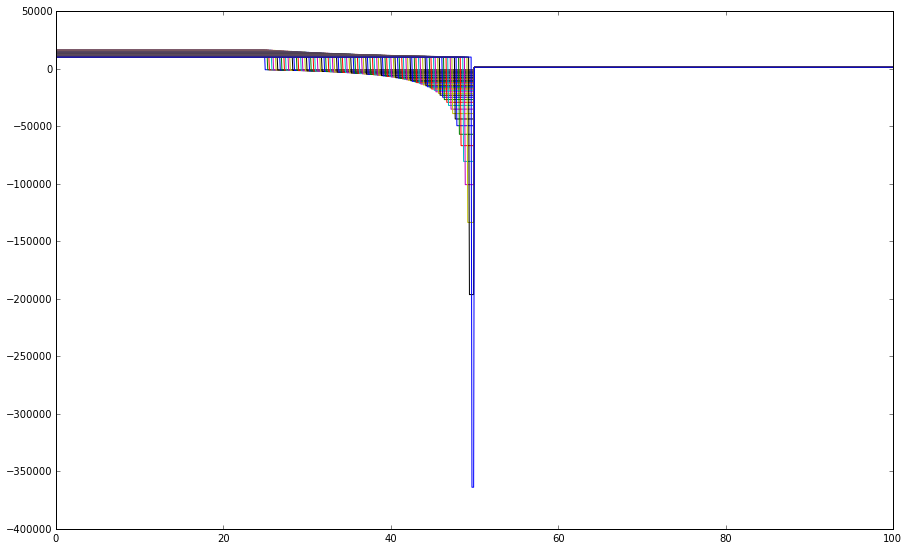

In [16]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(time_ms, u[i,:])

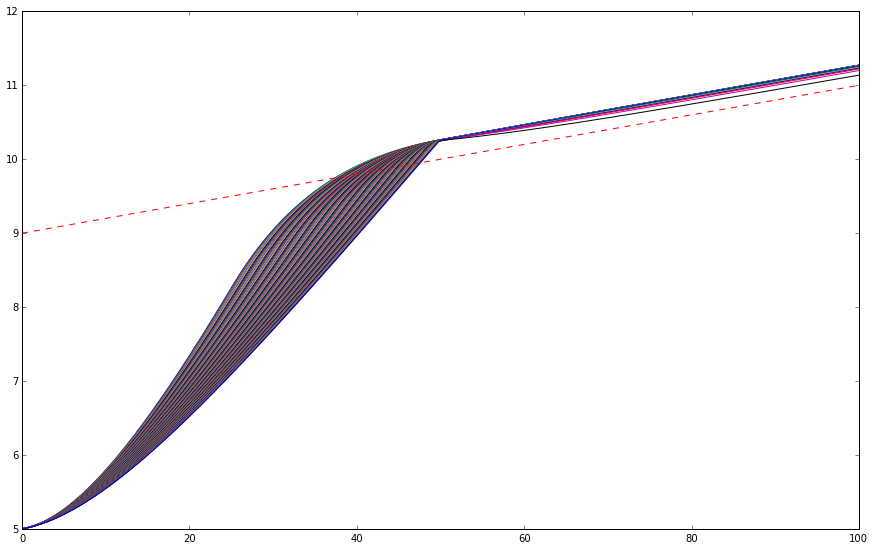

In [17]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(time_ms,position[i,:])
ax.plot([0,(t_T+t_R)*1000],[xT,xT+v0*(T+R+1)*dt],'r--')

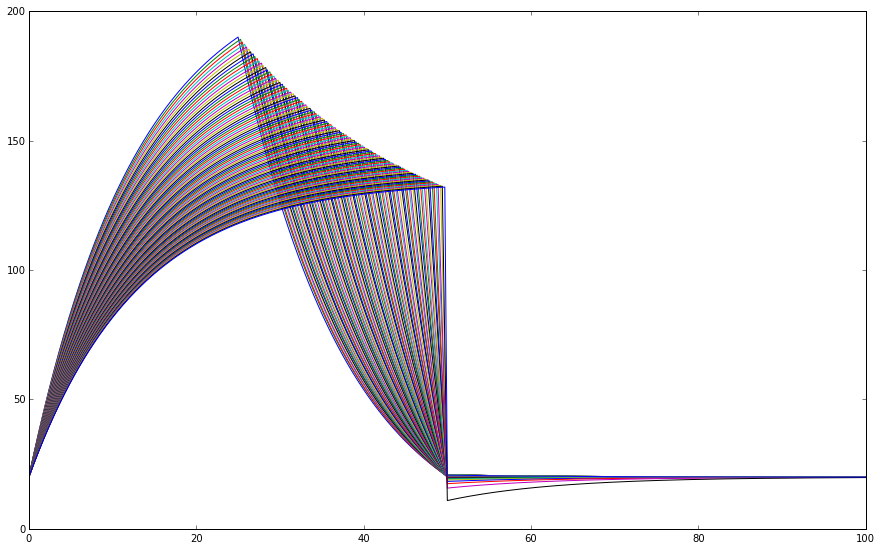

In [18]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(time_ms, velocity[i,:])

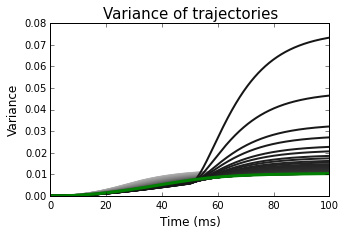

In [26]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(time_ms, variancev[i,:]/dt,lw=2,color=(0.7-1.6*i/255,0.7-1.6*i/255,0.7-1.6*i/255))
    ax.set_title(r'Variance of trajectories', fontsize = 15)
    ax.set_xlabel('Time (ms)', fontsize=12)
    ax.set_ylabel('Variance', fontsize=12)
ax.plot(time_ms, variancev[ind_best,:]/dt,lw=3,color='g')

In [20]:
somme = np.zeros(n-1)
for i in np.arange(n-1):
    for j in T+np.arange(R+1):
        somme[i] += variancev[i,j]

In [21]:
ind_best = np.argmin(somme)

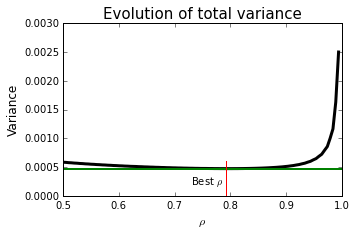

In [34]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(rho[0:n-1], somme,lw=3,color=(0,0,0))
ax.set_title(r'Evolution of total variance', fontsize = 15)
ax.set_xlabel(r'$\rho$', fontsize=12)
ax.set_ylabel('Variance', fontsize=12)
ax.plot([0.5,rho[n-1]],[somme[ind_best],somme[ind_best]],lw=2,color='g')
ax.plot([rho[ind_best],rho[ind_best]],[0,0.0006], color='r')
plt.text(0.73,0.0002,r'Best $\rho$', fontsize=10)

In [68]:
rho[ind_best]

0.80242424242424248

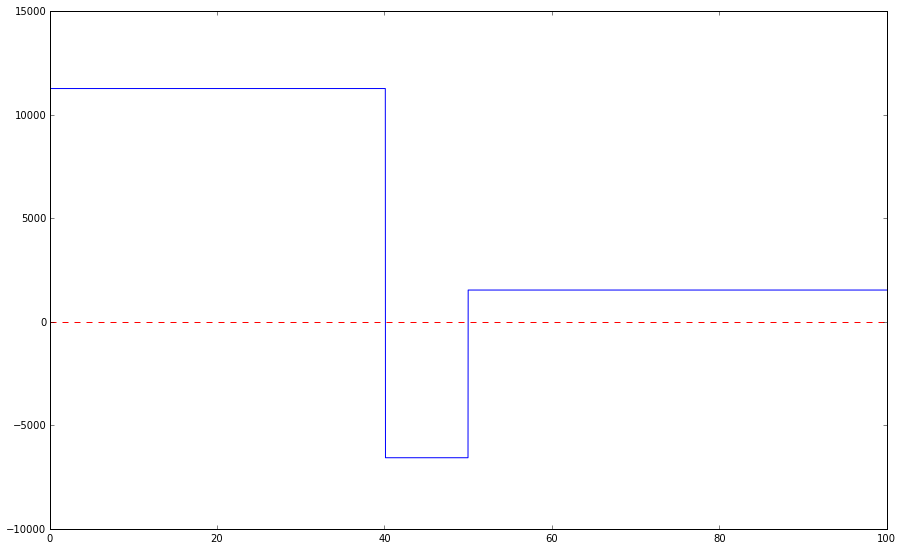

In [69]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, u[ind_best,:])

ax.plot([0,(t_T+t_R)*1000],[0,0],'r--')

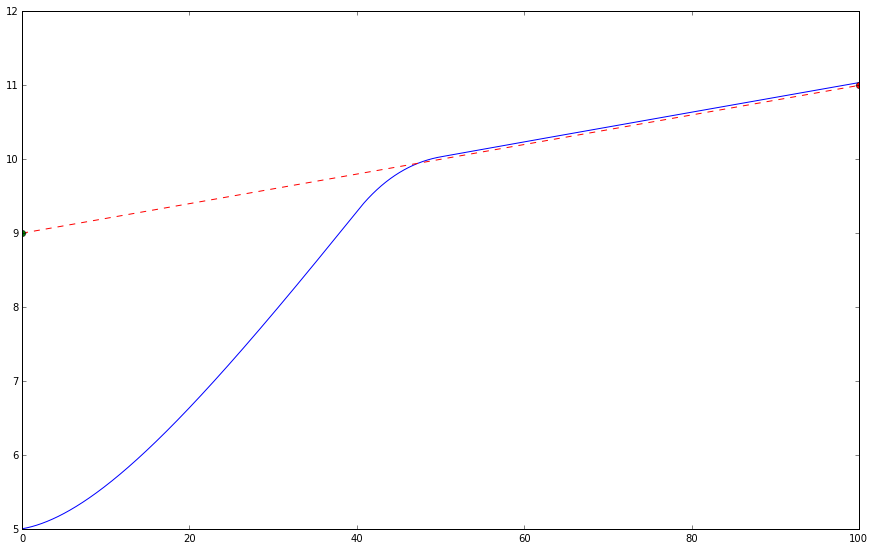

In [70]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms,position[ind_best,:])

ax.plot([0,(t_T+t_R)*1000],[xT,xT+v0*(T+R+1)*dt],'r--')
ax.plot([0],[xT], marker = 'o')
ax.plot([(t_T+t_R)*1000],[xT+v0*(T+R+1)*dt], marker = 'o')

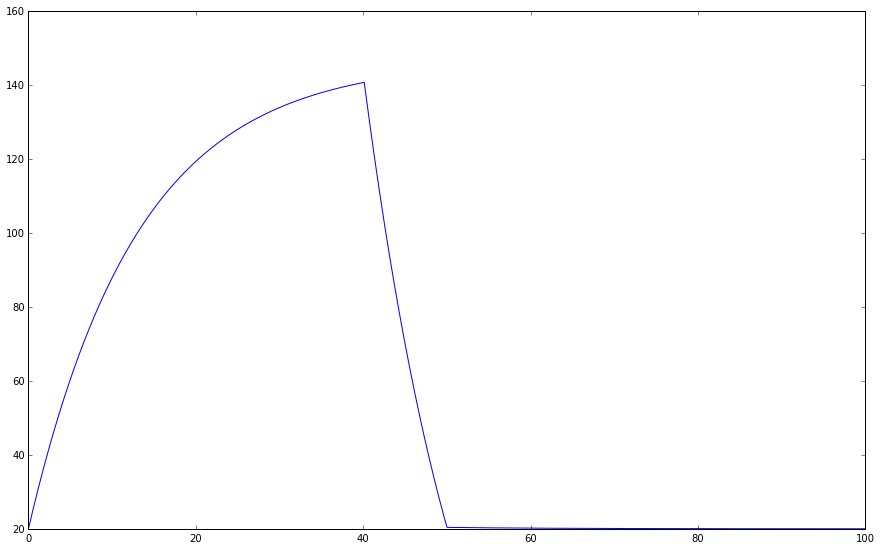

In [71]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, velocity[ind_best,:])

ax.plot([0,(t_T+t_R)*1000],[v0,v0],'r--')